# Compare All Classification Algorithm

### SOURCE and Note
- [kfold](https://www.tensorflow.org/tensorboard/image_summaries)
- Dont use 99 % dataset, became overfit

### Import Library

In [1]:
from pandas import read_csv
from matplotlib import pyplot

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import SGDClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier



## Input Dataset

In [2]:
url = "/home/jos/tf_lab/Ultralight-SimplePose/generator_dataset/dataset_file_5.csv"
# url = "dataset_file_5.csv"
data_title = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','res']

dataset = read_csv(url, names=data_title)
array = dataset.values

X = array[:,[5,6,11,12,13,14,15,16]]
y = array[:,len(data_title)-1]
data_title = ['5','6','11','12','13','14','15','16','res']
# train_size?
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, shuffle=True)

### Print

In [3]:
X_train

array([[0.484106, 0.524178, 0.129827, ..., 0.303629, 0.831529, 0.846028],
       [0.501075, 0.55662 , 0.083466, ..., 0.449552, 0.748118, 0.859963],
       [0.400722, 0.284162, 0.5373  , ..., 0.365044, 0.666612, 0.584378],
       ...,
       [0.580348, 0.547485, 0.068987, ..., 0.431324, 0.829976, 0.8524  ],
       [0.471284, 0.501541, 0.141788, ..., 0.267937, 0.815024, 0.826587],
       [0.536399, 0.483602, 0.317416, ..., 0.448485, 0.630101, 0.645096]])

In [4]:
X_validation

array([[0.571901, 0.580673, 0.120507, ..., 0.456752, 0.808353, 0.860925],
       [0.5616  , 0.468567, 0.3125  , ..., 0.47947 , 0.673144, 0.634597],
       [0.483713, 0.523812, 0.110208, ..., 0.304241, 0.800807, 0.846985],
       ...,
       [0.647396, 0.587504, 0.144724, ..., 0.379626, 0.882199, 0.817234],
       [0.560897, 0.468903, 0.304064, ..., 0.450134, 0.674107, 0.635559],
       [0.520449, 0.469555, 0.337983, ..., 0.457579, 0.627144, 0.652518]])

In [5]:
Y_train

array([3., 2., 1., 1., 1., 2., 3., 2., 3., 1., 2., 2., 3., 2., 2., 2., 2.,
       1., 3., 1., 2., 1., 1., 1., 3., 2., 3., 2., 2., 1., 1., 1., 1., 2.,
       2., 1., 1., 3., 3., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2.,
       3., 3., 1., 2., 3., 1., 2., 1., 1., 1., 3., 2., 2., 1., 1., 1., 2.,
       1., 2., 1., 2., 1., 1., 3., 3., 3., 3., 1., 2., 1., 3., 3., 2., 1.,
       2., 2., 3., 1., 2., 1., 1., 1., 1., 1., 2., 2., 3., 1., 1., 3., 1.,
       2., 1., 2., 1., 1., 1., 1., 3., 2., 2., 1., 2., 3., 2., 2., 2., 3.,
       3., 1., 2., 3., 1., 3., 2., 1., 3., 3., 1., 2., 2., 2., 3., 2., 1.,
       2., 2., 2., 1., 2., 2., 3., 3., 2., 1., 2., 2., 3., 2., 2., 3., 1.,
       1., 1., 2., 3., 2., 3., 3., 2., 3., 1., 2., 2., 2., 3., 3., 1., 3.,
       2., 1., 2., 2., 2., 2., 2., 3., 1., 2., 1., 2., 2., 3., 3., 2., 2.,
       1., 2., 1., 3., 2., 3., 1., 2., 3., 2., 1., 2., 2., 1., 3., 2., 3.,
       1., 2., 2., 3., 3., 2., 1., 1., 1., 2., 3., 1., 3., 3., 3., 2., 1.,
       2., 2., 1., 3., 3.

In [6]:
Y_validation

array([2., 1., 3., 3., 2., 2., 2., 2., 3., 2., 1., 2., 3., 1., 1., 3., 1.,
       1., 3., 1., 2., 2., 1., 1., 3., 2., 2., 2., 2., 1., 1., 2., 1., 2.,
       1., 3., 1., 2., 1., 3., 3., 2., 1., 3., 3., 3., 2., 3., 3., 3., 2.,
       1., 2., 1., 1., 1., 2., 2., 1., 1., 3., 1., 2., 2., 1., 1., 2., 2.,
       1., 1., 2., 2., 2., 2., 3., 3., 3., 2., 3., 1., 2., 2., 2., 1., 3.,
       2., 3., 2., 3., 1., 1., 2., 3., 2., 1., 2., 1., 1., 3., 1., 3., 1.,
       3., 3., 2., 1., 3., 3., 2., 2., 2., 1., 1., 2., 2., 3., 1., 3., 3.,
       2., 2., 2., 2., 1., 2., 2., 1., 1., 3., 1., 2., 3., 1., 2., 2., 2.,
       2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 3.,
       3., 3., 1., 1., 3., 1., 3., 2., 1., 1.])

## Training

### Load Model to List

In [7]:
# Spot Check Algorithms
models = []
models.append(('AB', AdaBoostClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('NNMLP', MLPClassifier(alpha=1, max_iter=1000)))
models.append(('GB', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [8]:
results = []
names = []
for name, model in models:
    # print(name,'-',model)
    kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(name,': ',cv_results)


AB :  [1.         0.98461538 0.98461538 1.         0.98461538 1.
 0.98461538 1.         0.96923077 1.        ]
SGD :  [0.96923077 0.98461538 1.         1.         0.96923077 0.96923077
 0.98461538 0.98461538 1.         1.        ]
NNMLP :  [1.         0.98461538 1.         1.         1.         1.
 0.98461538 1.         1.         1.        ]
GB :  [0.98461538 0.98461538 1.         1.         1.         0.98461538
 1.         1.         1.         1.        ]
RF :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
KNN :  [1.         0.98461538 1.         1.         1.         1.
 0.98461538 1.         1.         1.        ]
CART :  [0.98461538 1.         1.         1.         0.98461538 0.98461538
 0.98461538 1.         1.         1.        ]
NB :  [0.98461538 1.         1.         1.         1.         1.
 0.98461538 0.98461538 1.         1.        ]
SVM :  [1.         0.98461538 1.         1.         1.         1.
 0.98461538 1.         1.         1.        ]


In [9]:
for i in range(len(results)):
    # print(type(results[i]))
    print('%s : \t\t%f \t\t %f' %(names[i], results[i].mean(), results[i].std() ))
    # print(names[i],' : \n',results[i])

AB : 		0.990769 		 0.010205
SGD : 		0.986154 		 0.012779
NNMLP : 		0.996923 		 0.006154
GB : 		0.995385 		 0.007050
RF : 		1.000000 		 0.000000
KNN : 		0.996923 		 0.006154
CART : 		0.993846 		 0.007537
NB : 		0.995385 		 0.007050
SVM : 		0.996923 		 0.006154


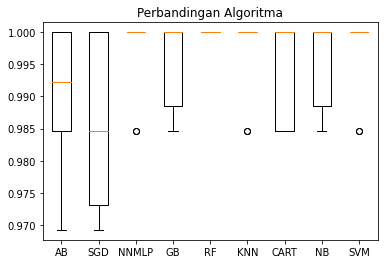

In [10]:
pyplot.boxplot(results, labels = names)
pyplot.title('Perbandingan Algoritma')
pyplot.show()